In [1]:
from typing import Callable
from os import makedirs
from os.path import join
import numpy as np
import pandas as pd
from verma_net_radiation import process_verma_net_radiation_table
from PTJPLSM import process_PTJPLSM_table
from monte_carlo_sensitivity import perturbed_run, sensitivity_analysis, divide_absolute_by_unperturbed
import matplotlib.pyplot as plt
from scipy.stats import mstats
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [2]:
input_filename = "ECOv002-cal-val-PT-JPL-SM-inputs.csv"

In [3]:
normalization_function = divide_absolute_by_unperturbed

In [4]:
input_df = pd.read_csv(input_filename)
input_df = input_df[input_df.fAPARmax != 0]
input_df

,ID,name,Topt,fAPARmax,canopy_height_meters,field_capacity,wilting_point,geometry,ST_K,ST_C,NDVI,Ta_C,RH,Rg,Rn,albedo,SM,EmisWB
0,US-NC3,NC_Clearcut#3,10.09,0.4659,20.642902,0.24,0.11,POINT (-76.656 35.799),305.10,31.95,0.709729,32.658920,0.560215,545.51056,393.85710,0.215445,0.192359,0.948
1,US-Mi3,LTAR UCB (Upper Chesapeake Bay) Miscanthus 3,1.39,0.4865,0.000000,0.31,0.14,POINT (-80.637 41.8222),304.34,31.19,0.605842,24.227982,0.458503,848.34390,643.47500,0.117238,0.293216,0.952
2,US-Mi3,LTAR UCB (Upper Chesapeake Bay) Miscanthus 3,1.39,0.4865,0.000000,0.31,0.14,POINT (-80.637 41.8222),304.06,30.91,0.578494,26.178862,0.621679,838.81160,628.76870,0.117280,0.433436,0.972
3,US-Mi3,LTAR UCB (Upper Chesapeake Bay) Miscanthus 3,1.39,0.4865,0.000000,0.31,0.14,POINT (-80.637 41.8222),301.80,28.65,0.658499,22.527096,0.623986,851.72480,626.95960,0.084629,0.391243,0.974
4,US-Mi3,LTAR UCB (Upper Chesapeake Bay) Miscanthus 3,1.39,0.4865,0.000000,0.31,0.14,POINT (-80.637 41.8222),303.18,30.03,0.666747,23.280691,0.571613,702.55160,513.13380,0.120526,0.333870,0.960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,US-xAE,NEON Klemme Range Research Station (OAES),7.99,0.3387,0.000000,0.28,0.13,POINT (-99.0588 35.4106),278.78,5.63,0.268441,3.815752,0.395740,286.84660,163.24739,0.092853,0.085971,0.980
1061,US-xAE,NEON Klemme Range Research Station (OAES),7.99,0.3387,0.000000,0.28,0.13,POINT (-99.0588 35.4106),293.28,20.13,0.225175,19.266186,0.397430,290.87400,166.19196,0.111844,0.086697,0.976
1062,US-xAE,NEON Klemme Range Research Station (OAES),7.99,0.3387,0.000000,0.28,0.13,POINT (-99.0588 35.4106),301.94,28.79,0.282996,32.110336,0.341227,352.19530,235.88159,0.106782,0.058330,0.976
1063,US-xAE,NEON Klemme Range Research Station (OAES),7.99,0.3387,0.000000,0.28,0.13,POINT (-99.0588 35.4106),290.72,17.57,0.284051,10.464681,0.349086,420.67880,247.87890,0.106775,0.067998,0.976


In [5]:
np.nanmin(input_df.fAPARmax)

np.float64(0.2331)

In [6]:
def process_verma_PTJPLSM_table(input_df: pd.DataFrame) -> pd.DataFrame:
    return process_PTJPLSM_table(process_verma_net_radiation_table(input_df))

In [7]:
processed = process_verma_PTJPLSM_table(input_df)
processed

[2025-07-21 17:51:17 INFO] variable fAPARmax min: 0.233 mean: 0.382 max: 0.624 nan: 0.00% (nan)
[2025-07-21 17:51:17 INFO] GEOS-5 FP working directory: /Users/gregoryhalverson/data/GEOS5FP
[2025-07-21 17:51:17 INFO] GEOS-5 FP download directory: ~/data/GEOS5FP
[2025-07-21 17:51:17 INFO] variable Ta_C min: -14.605 mean: 22.322 max: 39.710 nan: 0.00% (nan)
[2025-07-21 17:51:17 INFO] variable RH min: 0.273 mean: 0.427 max: 0.984 nan: 0.00% (nan)
[2025-07-21 17:51:17 INFO] variable soil_moisture min: 0.000 mean: 0.168 max: 0.897 nan: 0.00% (nan)
[2025-07-21 17:51:17 INFO] variable field_capacity min: 0.190 mean: 0.283 max: 0.390 nan: 0.00% (nan)
[2025-07-21 17:51:17 INFO] variable wilting_point min: 0.040 mean: 0.121 max: 0.290 nan: 0.00% (nan)
[2025-07-21 17:51:17 INFO] variable canopy_height_meters min: 0.000 mean: 6.044 max: 30.192 nan: 0.00% (nan)
[2025-07-21 17:51:17 INFO] variable Rn_Wm2 min: 0.000 mean: 540.764 max: 929.140 nan: 0.00% (nan)
[2025-07-21 17:51:17 INFO] variable G min:

/Users/gregoryhalverson/Projects/PT-JPL-SM/PTJPLSM/partitioning/fREW.py:36: RuntimeWarning: divide by zero encountered in divide
  fREW = rt.clip(rt.where(FCWP == 0, 0, SMWP / FCWP), 0, 1)
/Users/gregoryhalverson/Projects/PT-JPL-SM/PTJPLSM/partitioning/fREW.py:36: RuntimeWarning: invalid value encountered in divide
  fREW = rt.clip(rt.where(FCWP == 0, 0, SMWP / FCWP), 0, 1)
/Users/gregoryhalverson/Projects/PT-JPL-SM/PTJPLSM/partitioning/fTRM.py:28: RuntimeWarning: divide by zero encountered in divide
  WPCH = rt.clip(rt.where(CHscalar == 0, 0, wilting_point / CHscalar), 0, 1)
/Users/gregoryhalverson/Projects/PT-JPL-SM/PTJPLSM/partitioning/fTRM.py:30: RuntimeWarning: invalid value encountered in power
  fTREW = rt.clip(1 - ((CR - soil_moisture) / (CR - WPCH)) ** CHscalar, 0, 1)


,ID,name,Topt,fAPARmax,canopy_height_meters,field_capacity,wilting_point,geometry,ST_K,ST_C,...,LWin,LWout,G,Rn_soil,LE_soil,Rn_canopy,PET,LE_canopy,LE_interception,LE
0,US-NC3,NC_Clearcut#3,10.09,0.4659,20.642902,0.24,0.11,POINT (-76.656 35.799),305.10,31.95,...,433.191382,465.788054,55.420608,117.385933,62.999778,310.597334,378.782244,244.687184,31.103312,338.790274
1,US-Mi3,LTAR UCB (Upper Chesapeake Bay) Miscanthus 3,1.39,0.4865,0.000000,0.31,0.14,POINT (-80.637 41.8222),304.34,31.19,...,355.960473,463.110120,94.629649,282.787979,173.538416,466.097716,603.420311,259.435029,18.998512,451.971957
2,US-Mi3,LTAR UCB (Upper Chesapeake Bay) Miscanthus 3,1.39,0.4865,0.000000,0.31,0.14,POINT (-80.637 41.8222),304.06,30.91,...,385.005187,471.101631,95.107595,300.380354,194.326703,440.055069,610.916079,109.255215,62.226317,365.808235
3,US-Mi3,LTAR UCB (Upper Chesapeake Bay) Miscanthus 3,1.39,0.4865,0.000000,0.31,0.14,POINT (-80.637 41.8222),301.80,28.65,...,357.100788,458.191551,80.650242,253.032168,155.100867,526.611971,628.920686,124.147125,71.831299,351.079291
4,US-Mi3,LTAR UCB (Upper Chesapeake Bay) Miscanthus 3,1.39,0.4865,0.000000,0.31,0.14,POINT (-80.637 41.8222),303.18,30.03,...,358.727378,459.922447,70.196499,195.471497,113.986666,422.404088,498.328592,142.086880,41.032451,297.105996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,US-xAE,NEON Klemme Range Research Station (OAES),7.99,0.3387,0.000000,0.28,0.13,POINT (-99.0588 35.4106),278.78,5.63,...,237.686968,335.647726,6.540141,193.589280,2.663305,66.622637,147.265085,21.904192,0.948609,25.516106
1061,US-xAE,NEON Klemme Range Research Station (OAES),7.99,0.3387,0.000000,0.28,0.13,POINT (-99.0588 35.4106),293.28,20.13,...,317.465236,409.440488,24.005039,205.035070,3.853056,53.306459,199.918196,30.719950,1.134579,35.707584
1062,US-xAE,NEON Klemme Range Research Station (OAES),7.99,0.3387,0.000000,0.28,0.13,POINT (-99.0588 35.4106),301.94,28.79,...,401.910116,459.984925,41.311849,228.822037,2.571087,85.765103,276.387497,71.833351,1.175987,75.580426
1063,US-xAE,NEON Klemme Range Research Station (OAES),7.99,0.3387,0.000000,0.28,0.13,POINT (-99.0588 35.4106),290.72,17.57,...,266.094367,395.330786,30.111278,272.867147,2.546417,102.893507,244.155107,59.694031,1.079314,63.319762


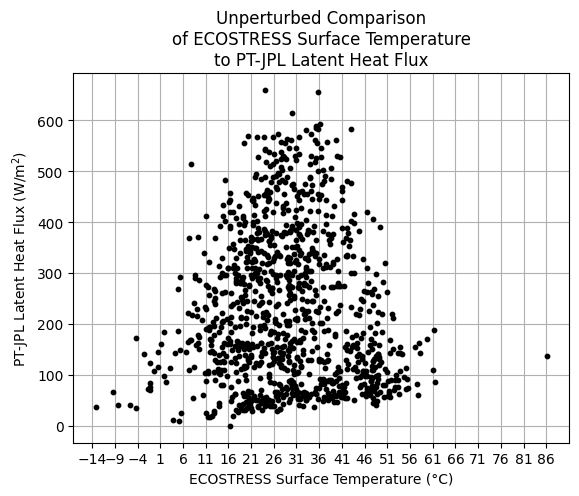

In [8]:
plt.xticks(range(int(min(processed.ST_C)), int(max(processed.ST_C)) + 1, 5))
plt.scatter(x=processed.ST_C, y=processed.LE, color='black', s=10, zorder=5)
plt.grid(True, zorder=0)
plt.xlabel("ECOSTRESS Surface Temperature (°C)")
plt.ylabel("PT-JPL Latent Heat Flux (W/m$^2$)")
plt.title("Unperturbed Comparison\nof ECOSTRESS Surface Temperature\nto PT-JPL Latent Heat Flux")

plt.savefig("Unperturbed Comparison of ECOSTRESS Surface Temperature to PT-JPL Latent Heat Flux.jpeg", format='jpeg', bbox_inches='tight')
plt.savefig("Unperturbed Comparison of ECOSTRESS Surface Temperature to PT-JPL Latent Heat Flux.svg", format='svg', bbox_inches='tight')

plt.show()

In [9]:
input_df = pd.read_csv(input_filename)

if "Ta" in input_df and "Ta_C" not in input_df:
    # input_df.rename({"Ta": "Ta_C"}, inplace=True)
    input_df["Ta_C"] = input_df["Ta"]

input_df = input_df[input_df.fAPARmax.apply(lambda fAPARmax: fAPARmax > 0.001)]
input_df = input_df[input_df.NDVI.apply(lambda NDVI: NDVI > 0.05)]

np.nanmin(input_df.ST_C), np.nanmax(input_df.ST_C)

(np.float64(-13.189999999999998), np.float64(86.11000000000001))

In [10]:
len(input_df)

1063

In [11]:
input_variable = "ST_C"
output_variable = "LE"

results = perturbed_run(
    input_df=input_df, 
    input_variable=input_variable, 
    output_variable=output_variable, 
    forward_process=process_verma_PTJPLSM_table,
    normalization_function=normalization_function
)

results

[2025-07-21 17:51:18 INFO] variable fAPARmax min: 0.233 mean: 0.382 max: 0.624 nan: 0.00% (nan)
[2025-07-21 17:51:18 INFO] GEOS-5 FP working directory: /Users/gregoryhalverson/data/GEOS5FP
[2025-07-21 17:51:18 INFO] GEOS-5 FP download directory: ~/data/GEOS5FP
[2025-07-21 17:51:18 INFO] variable Ta_C min: -14.605 mean: 22.380 max: 39.710 nan: 0.00% (nan)
[2025-07-21 17:51:18 INFO] variable RH min: 0.273 mean: 0.427 max: 0.984 nan: 0.00% (nan)
[2025-07-21 17:51:18 INFO] variable soil_moisture min: 0.000 mean: 0.168 max: 0.897 nan: 0.00% (nan)
[2025-07-21 17:51:18 INFO] variable field_capacity min: 0.190 mean: 0.283 max: 0.390 nan: 0.00% (nan)
[2025-07-21 17:51:18 INFO] variable wilting_point min: 0.040 mean: 0.121 max: 0.290 nan: 0.00% (nan)
[2025-07-21 17:51:18 INFO] variable canopy_height_meters min: 0.000 mean: 6.055 max: 30.192 nan: 0.00% (nan)
[2025-07-21 17:51:18 INFO] variable Rn_Wm2 min: 0.000 mean: 541.497 max: 929.140 nan: 0.00% (nan)
[2025-07-21 17:51:18 INFO] variable G min:

/Users/gregoryhalverson/Projects/PT-JPL-SM/PTJPLSM/partitioning/fREW.py:36: RuntimeWarning: divide by zero encountered in divide
  fREW = rt.clip(rt.where(FCWP == 0, 0, SMWP / FCWP), 0, 1)
/Users/gregoryhalverson/Projects/PT-JPL-SM/PTJPLSM/partitioning/fREW.py:36: RuntimeWarning: invalid value encountered in divide
  fREW = rt.clip(rt.where(FCWP == 0, 0, SMWP / FCWP), 0, 1)
/Users/gregoryhalverson/Projects/PT-JPL-SM/PTJPLSM/partitioning/fTRM.py:28: RuntimeWarning: divide by zero encountered in divide
  WPCH = rt.clip(rt.where(CHscalar == 0, 0, wilting_point / CHscalar), 0, 1)
/Users/gregoryhalverson/Projects/PT-JPL-SM/PTJPLSM/partitioning/fTRM.py:30: RuntimeWarning: invalid value encountered in power
  fTREW = rt.clip(1 - ((CR - soil_moisture) / (CR - WPCH)) ** CHscalar, 0, 1)
/Users/gregoryhalverson/Projects/PT-JPL-SM/PTJPLSM/partitioning/fREW.py:36: RuntimeWarning: divide by zero encountered in divide
  fREW = rt.clip(rt.where(FCWP == 0, 0, SMWP / FCWP), 0, 1)
/Users/gregoryhalverson

,input_variable,output_variable,input_unperturbed,input_perturbation,input_perturbation_std,input_perturbed,output_unperturbed,output_perturbation,output_perturbation_std,output_perturbed
0,ST_C,LE,31.95,-1.118823,0.035018,30.831177,338.790274,1.973089,0.005824,340.763363
1,ST_C,LE,31.95,-2.270706,0.071071,29.679294,338.790274,4.00448,0.01182,342.794754
2,ST_C,LE,31.95,-11.954147,0.374152,19.995853,338.790274,51.540593,0.152131,390.330867
3,ST_C,LE,31.95,-21.947127,0.686921,10.002873,338.790274,116.01153,0.342429,454.801804
4,ST_C,LE,31.95,6.487346,0.203047,38.437346,338.790274,-11.440685,0.033769,327.349589
...,...,...,...,...,...,...,...,...,...,...
106295,ST_C,LE,41.61,16.315217,0.392098,57.925217,155.964595,-1.121422,0.00719,154.843173
106296,ST_C,LE,41.61,-6.712293,0.161314,34.897707,155.964595,0.461368,0.002958,156.425963
106297,ST_C,LE,41.61,3.732256,0.089696,45.342256,155.964595,-0.256536,0.001645,155.708060
106298,ST_C,LE,41.61,1.496003,0.035953,43.106003,155.964595,-0.102827,0.000659,155.861768


In [12]:
filtered_results = results.dropna()
filtered_results

,input_variable,output_variable,input_unperturbed,input_perturbation,input_perturbation_std,input_perturbed,output_unperturbed,output_perturbation,output_perturbation_std,output_perturbed
0,ST_C,LE,31.95,-1.118823,0.035018,30.831177,338.790274,1.973089,0.005824,340.763363
1,ST_C,LE,31.95,-2.270706,0.071071,29.679294,338.790274,4.00448,0.01182,342.794754
2,ST_C,LE,31.95,-11.954147,0.374152,19.995853,338.790274,51.540593,0.152131,390.330867
3,ST_C,LE,31.95,-21.947127,0.686921,10.002873,338.790274,116.01153,0.342429,454.801804
4,ST_C,LE,31.95,6.487346,0.203047,38.437346,338.790274,-11.440685,0.033769,327.349589
...,...,...,...,...,...,...,...,...,...,...
106295,ST_C,LE,41.61,16.315217,0.392098,57.925217,155.964595,-1.121422,0.00719,154.843173
106296,ST_C,LE,41.61,-6.712293,0.161314,34.897707,155.964595,0.461368,0.002958,156.425963
106297,ST_C,LE,41.61,3.732256,0.089696,45.342256,155.964595,-0.256536,0.001645,155.708060
106298,ST_C,LE,41.61,1.496003,0.035953,43.106003,155.964595,-0.102827,0.000659,155.861768


In [13]:
# plt.scatter(filtered_results.input_perturbation, filtered_results.output_perturbation)

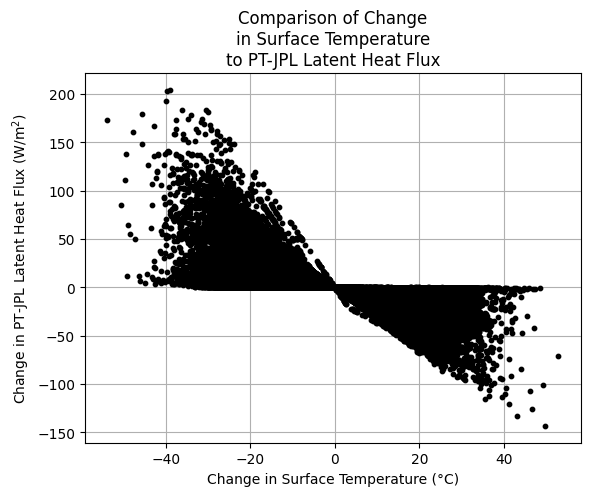

In [14]:
# plt.xticks(range(int(min(processed.ST_C)), int(max(processed.ST_C)) + 1, 5))
# plt.ylim(-350, 150)
plt.scatter(x=results.input_perturbation, y=results.output_perturbation, color='black', s=10, zorder=5)  # Adjust the 's' parameter to make dots thinner
plt.grid(True, zorder=0)
plt.xlabel("Change in Surface Temperature (°C)")
plt.ylabel("Change in PT-JPL Latent Heat Flux (W/m$^2$)")
plt.title("Comparison of Change\nin Surface Temperature\nto PT-JPL Latent Heat Flux")

plt.savefig("Comparison of Change in Surface Temperature to PT-JPL Latent Heat Flux.jpeg", format='jpeg', bbox_inches='tight')
plt.savefig("Comparison of Change in Surface Temperature to PT-JPL Latent Heat Flux.svg", format='svg', bbox_inches='tight')

plt.show()

In [15]:
correlation = mstats.pearsonr(
    np.array(filtered_results.input_perturbation_std).astype(np.float64), 
    np.array(filtered_results.output_perturbation_std).astype(np.float64)
)[0]

correlation

np.float64(0.11738096481288131)

In [16]:
input_variables = ["ST_C", "NDVI", "albedo", "Ta_C", "RH"]
output_variables = ["LE"]

perturbation_df, sensitivity_metrics_df = sensitivity_analysis(
    input_df=input_df,
    input_variables=input_variables,
    output_variables=output_variables,
    forward_process=process_verma_PTJPLSM_table,
    normalization_function=normalization_function
)

sensitivity_metrics_df

[2025-07-21 17:51:19 INFO] variable fAPARmax min: 0.233 mean: 0.382 max: 0.624 nan: 0.00% (nan)
[2025-07-21 17:51:19 INFO] GEOS-5 FP working directory: /Users/gregoryhalverson/data/GEOS5FP
[2025-07-21 17:51:19 INFO] GEOS-5 FP download directory: ~/data/GEOS5FP
[2025-07-21 17:51:19 INFO] variable Ta_C min: -14.605 mean: 22.380 max: 39.710 nan: 0.00% (nan)
[2025-07-21 17:51:19 INFO] variable RH min: 0.273 mean: 0.427 max: 0.984 nan: 0.00% (nan)
[2025-07-21 17:51:19 INFO] variable soil_moisture min: 0.000 mean: 0.168 max: 0.897 nan: 0.00% (nan)
[2025-07-21 17:51:19 INFO] variable field_capacity min: 0.190 mean: 0.283 max: 0.390 nan: 0.00% (nan)
[2025-07-21 17:51:19 INFO] variable wilting_point min: 0.040 mean: 0.121 max: 0.290 nan: 0.00% (nan)
[2025-07-21 17:51:19 INFO] variable canopy_height_meters min: 0.000 mean: 6.055 max: 30.192 nan: 0.00% (nan)
[2025-07-21 17:51:19 INFO] variable Rn_Wm2 min: 0.000 mean: 541.497 max: 929.140 nan: 0.00% (nan)
[2025-07-21 17:51:19 INFO] variable G min:

/Users/gregoryhalverson/Projects/PT-JPL-SM/PTJPLSM/partitioning/fREW.py:36: RuntimeWarning: divide by zero encountered in divide
  fREW = rt.clip(rt.where(FCWP == 0, 0, SMWP / FCWP), 0, 1)
/Users/gregoryhalverson/Projects/PT-JPL-SM/PTJPLSM/partitioning/fREW.py:36: RuntimeWarning: invalid value encountered in divide
  fREW = rt.clip(rt.where(FCWP == 0, 0, SMWP / FCWP), 0, 1)
/Users/gregoryhalverson/Projects/PT-JPL-SM/PTJPLSM/partitioning/fTRM.py:28: RuntimeWarning: divide by zero encountered in divide
  WPCH = rt.clip(rt.where(CHscalar == 0, 0, wilting_point / CHscalar), 0, 1)
/Users/gregoryhalverson/Projects/PT-JPL-SM/PTJPLSM/partitioning/fTRM.py:30: RuntimeWarning: invalid value encountered in power
  fTREW = rt.clip(1 - ((CR - soil_moisture) / (CR - WPCH)) ** CHscalar, 0, 1)
/Users/gregoryhalverson/Projects/PT-JPL-SM/PTJPLSM/partitioning/fREW.py:36: RuntimeWarning: divide by zero encountered in divide
  fREW = rt.clip(rt.where(FCWP == 0, 0, SMWP / FCWP), 0, 1)
/Users/gregoryhalverson

[2025-07-21 17:51:19 INFO] variable fAPARmax min: 0.233 mean: 0.382 max: 0.624 nan: 0.00% (nan)
[2025-07-21 17:51:19 INFO] GEOS-5 FP working directory: /Users/gregoryhalverson/data/GEOS5FP
[2025-07-21 17:51:19 INFO] GEOS-5 FP download directory: ~/data/GEOS5FP
[2025-07-21 17:51:19 INFO] variable Ta_C min: -14.605 mean: 22.380 max: 39.710 nan: 0.00% (nan)
[2025-07-21 17:51:19 INFO] variable RH min: 0.273 mean: 0.427 max: 0.984 nan: 0.00% (nan)
[2025-07-21 17:51:19 INFO] variable soil_moisture min: 0.000 mean: 0.168 max: 0.897 nan: 0.00% (nan)
[2025-07-21 17:51:19 INFO] variable field_capacity min: 0.190 mean: 0.283 max: 0.390 nan: 0.00% (nan)
[2025-07-21 17:51:19 INFO] variable wilting_point min: 0.040 mean: 0.121 max: 0.290 nan: 0.00% (nan)
[2025-07-21 17:51:19 INFO] variable canopy_height_meters min: 0.000 mean: 6.055 max: 30.192 nan: 0.00% (nan)
[2025-07-21 17:51:19 INFO] variable Rn_Wm2 min: 0.000 mean: 541.497 max: 929.140 nan: 0.00% (nan)
[2025-07-21 17:51:19 INFO] variable G min:

/opt/homebrew/Caskroom/miniforge/base/envs/PTJPLSM/lib/python3.10/site-packages/monte_carlo_sensitivity/sensitivity_analysis.py:77: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perturbation_df = pd.concat([perturbation_df, run_results])
/opt/homebrew/Caskroom/miniforge/base/envs/PTJPLSM/lib/python3.10/site-packages/monte_carlo_sensitivity/sensitivity_analysis.py:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  sensitivity_metrics_df = pd.concat([sensitivity_metrics_df, pd.DataFrame([[
/Users/g

[2025-07-21 17:51:19 INFO] variable Rn_canopy min: 0.000 mean: 284.742 max: 926.836 nan: 13.29% (nan)
[2025-07-21 17:51:19 INFO] variable PET min: 0.000 mean: 429.693 max: 890.980 nan: 13.29% (nan)
[2025-07-21 17:51:19 INFO] variable fTRM min: 0.000 mean: 0.792 max: 1.000 nan: 13.29% (nan)
[2025-07-21 17:51:19 INFO] variable LE_canopy min: 0.000 mean: 180.938 max: 814.315 nan: 13.29% (nan)
[2025-07-21 17:51:19 INFO] variable LE_interception min: 0.000 mean: 14.230 max: 137.938 nan: 13.29% (nan)
[2025-07-21 17:51:19 INFO] variable LE min: 0.000 mean: 263.319 max: 863.392 nan: 13.29% (nan)
[2025-07-21 17:51:20 INFO] variable fAPARmax min: 0.233 mean: 0.382 max: 0.624 nan: 0.00% (nan)
[2025-07-21 17:51:20 INFO] GEOS-5 FP working directory: /Users/gregoryhalverson/data/GEOS5FP
[2025-07-21 17:51:20 INFO] GEOS-5 FP download directory: ~/data/GEOS5FP
[2025-07-21 17:51:20 INFO] variable Ta_C min: -14.605 mean: 22.380 max: 39.710 nan: 0.00% (nan)
[2025-07-21 17:51:20 INFO] variable RH min: 0.27

/Users/gregoryhalverson/Projects/PT-JPL-SM/PTJPLSM/partitioning/fTRM.py:28: RuntimeWarning: divide by zero encountered in divide
  WPCH = rt.clip(rt.where(CHscalar == 0, 0, wilting_point / CHscalar), 0, 1)
/Users/gregoryhalverson/Projects/PT-JPL-SM/PTJPLSM/partitioning/fTRM.py:30: RuntimeWarning: invalid value encountered in power
  fTREW = rt.clip(1 - ((CR - soil_moisture) / (CR - WPCH)) ** CHscalar, 0, 1)
/Users/gregoryhalverson/Projects/PT-JPL-SM/PTJPLSM/partitioning/fREW.py:36: RuntimeWarning: divide by zero encountered in divide
  fREW = rt.clip(rt.where(FCWP == 0, 0, SMWP / FCWP), 0, 1)
/Users/gregoryhalverson/Projects/PT-JPL-SM/PTJPLSM/partitioning/fREW.py:36: RuntimeWarning: invalid value encountered in divide
  fREW = rt.clip(rt.where(FCWP == 0, 0, SMWP / FCWP), 0, 1)
/Users/gregoryhalverson/Projects/PT-JPL-SM/PTJPLSM/partitioning/fTRM.py:28: RuntimeWarning: divide by zero encountered in divide
  WPCH = rt.clip(rt.where(CHscalar == 0, 0, wilting_point / CHscalar), 0, 1)
/Users

[2025-07-21 17:51:20 INFO] variable fAPARmax min: 0.233 mean: 0.382 max: 0.624 nan: 0.00% (nan)
[2025-07-21 17:51:20 INFO] GEOS-5 FP working directory: /Users/gregoryhalverson/data/GEOS5FP
[2025-07-21 17:51:20 INFO] GEOS-5 FP download directory: ~/data/GEOS5FP
[2025-07-21 17:51:20 INFO] variable Ta_C min: -14.605 mean: 22.380 max: 39.710 nan: 0.00% (nan)
[2025-07-21 17:51:20 INFO] variable RH min: 0.273 mean: 0.427 max: 0.984 nan: 0.00% (nan)
[2025-07-21 17:51:20 INFO] variable soil_moisture min: 0.000 mean: 0.168 max: 0.897 nan: 0.00% (nan)
[2025-07-21 17:51:20 INFO] variable field_capacity min: 0.190 mean: 0.283 max: 0.390 nan: 0.00% (nan)
[2025-07-21 17:51:20 INFO] variable wilting_point min: 0.040 mean: 0.121 max: 0.290 nan: 0.00% (nan)
[2025-07-21 17:51:20 INFO] variable canopy_height_meters min: 0.000 mean: 6.055 max: 30.192 nan: 0.00% (nan)
[2025-07-21 17:51:20 INFO] variable Rn_Wm2 min: 0.000 mean: 540.507 max: 1042.937 nan: 0.00% (nan)
[2025-07-21 17:51:20 INFO] variable G min

/Users/gregoryhalverson/Projects/PT-JPL-SM/PTJPLSM/partitioning/fREW.py:36: RuntimeWarning: divide by zero encountered in divide
  fREW = rt.clip(rt.where(FCWP == 0, 0, SMWP / FCWP), 0, 1)
/Users/gregoryhalverson/Projects/PT-JPL-SM/PTJPLSM/partitioning/fREW.py:36: RuntimeWarning: invalid value encountered in divide
  fREW = rt.clip(rt.where(FCWP == 0, 0, SMWP / FCWP), 0, 1)
/Users/gregoryhalverson/Projects/PT-JPL-SM/PTJPLSM/partitioning/fTRM.py:28: RuntimeWarning: divide by zero encountered in divide
  WPCH = rt.clip(rt.where(CHscalar == 0, 0, wilting_point / CHscalar), 0, 1)
/Users/gregoryhalverson/Projects/PT-JPL-SM/PTJPLSM/partitioning/fTRM.py:30: RuntimeWarning: invalid value encountered in power
  fTREW = rt.clip(1 - ((CR - soil_moisture) / (CR - WPCH)) ** CHscalar, 0, 1)
/Users/gregoryhalverson/Projects/PT-JPL-SM/PTJPLSM/partitioning/fREW.py:36: RuntimeWarning: divide by zero encountered in divide
  fREW = rt.clip(rt.where(FCWP == 0, 0, SMWP / FCWP), 0, 1)
/Users/gregoryhalverson

[2025-07-21 17:51:20 INFO] variable fAPARmax min: 0.233 mean: 0.382 max: 0.624 nan: 0.00% (nan)
[2025-07-21 17:51:20 INFO] GEOS-5 FP working directory: /Users/gregoryhalverson/data/GEOS5FP
[2025-07-21 17:51:20 INFO] GEOS-5 FP download directory: ~/data/GEOS5FP
[2025-07-21 17:51:20 INFO] variable Ta_C min: -36.771 mean: 22.371 max: 65.436 nan: 0.00% (nan)
[2025-07-21 17:51:20 INFO] variable RH min: 0.273 mean: 0.427 max: 0.984 nan: 0.00% (nan)
[2025-07-21 17:51:20 INFO] variable soil_moisture min: 0.000 mean: 0.168 max: 0.897 nan: 0.00% (nan)
[2025-07-21 17:51:20 INFO] variable field_capacity min: 0.190 mean: 0.283 max: 0.390 nan: 0.00% (nan)
[2025-07-21 17:51:20 INFO] variable wilting_point min: 0.040 mean: 0.121 max: 0.290 nan: 0.00% (nan)
[2025-07-21 17:51:20 INFO] variable canopy_height_meters min: 0.000 mean: 6.055 max: 30.192 nan: 0.00% (nan)
[2025-07-21 17:51:20 INFO] variable Rn_Wm2 min: 0.000 mean: 543.768 max: 1026.831 nan: 0.00% (nan)
[2025-07-21 17:51:20 INFO] variable G min

/Users/gregoryhalverson/Projects/PT-JPL-SM/PTJPLSM/partitioning/fREW.py:36: RuntimeWarning: divide by zero encountered in divide
  fREW = rt.clip(rt.where(FCWP == 0, 0, SMWP / FCWP), 0, 1)
/Users/gregoryhalverson/Projects/PT-JPL-SM/PTJPLSM/partitioning/fREW.py:36: RuntimeWarning: invalid value encountered in divide
  fREW = rt.clip(rt.where(FCWP == 0, 0, SMWP / FCWP), 0, 1)
/Users/gregoryhalverson/Projects/PT-JPL-SM/PTJPLSM/partitioning/fTRM.py:28: RuntimeWarning: divide by zero encountered in divide
  WPCH = rt.clip(rt.where(CHscalar == 0, 0, wilting_point / CHscalar), 0, 1)
/Users/gregoryhalverson/Projects/PT-JPL-SM/PTJPLSM/partitioning/fTRM.py:30: RuntimeWarning: invalid value encountered in power
  fTREW = rt.clip(1 - ((CR - soil_moisture) / (CR - WPCH)) ** CHscalar, 0, 1)
/Users/gregoryhalverson/Projects/PT-JPL-SM/PTJPLSM/partitioning/fREW.py:36: RuntimeWarning: divide by zero encountered in divide
  fREW = rt.clip(rt.where(FCWP == 0, 0, SMWP / FCWP), 0, 1)
/Users/gregoryhalverson

TypeError: float() argument must be a string or a real number, not 'complex'

In [ ]:
df = sensitivity_metrics_df
df = df[(df.output_variable == "LE") & (df.metric == "mean_normalized_change")]
ax = sns.barplot(x=df.input_variable, y=df.value * 100, color='black')
ax.set_xticklabels(["Surface\nTemperature", "NDVI", "Albedo", "Air\nTemperature", "Relative\nHumidity"])
plt.xlabel("Input Variable")
plt.ylabel("Average Percent Change in Output Perturbation")
plt.title("PT-JPL Latent Heat Flux Sensitivity Magnitude")
# plt.ylim(0, 160)  # Set y-axis range from 0 to 160
plt.grid(axis='y', color='lightgray', linestyle='-', linewidth=0.5)  # Add light gray horizontal gridlines only

# Add percent sign to y-axis tick labels
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{int(y)}%'))

plt.savefig("PT-JPL Latent Heat Flux Sensitivity Magnitude.jpeg", format='jpeg', bbox_inches='tight')
plt.savefig("PT-JPL Latent Heat Flux Sensitivity Magnitude.svg", format='svg', bbox_inches='tight')

plt.show()

In [ ]:
df = sensitivity_metrics_df
df = df[(df.output_variable == "LE") & (df.metric == "correlation")]
ax = sns.barplot(x=df.input_variable, y=df.value, color='black')
ax.set_xticklabels(["Surface\nTemperature", "NDVI", "Albedo", "Air\nTemperature", "Relative\nHumidity"])
# plt.ylim(0, 0.8)
plt.xlabel("Input Variable")
plt.ylabel("Correlation of Input Perturbation to Output Perturbation")
plt.title("PT-JPL Latent Heat Flux Sensitivity Correlation")
plt.grid(axis='y')  # Add horizontal gridlines

plt.savefig("PT-JPL Latent Heat Flux Sensitivity Correlation.jpeg", format='jpeg', bbox_inches='tight')
plt.savefig("PT-JPL Latent Heat Flux Sensitivity Correlation.svg", format='svg', bbox_inches='tight')

plt.show()